# Prudential insurance

In [1]:
import pandas as pd
raw_data = pd.read_csv("train.csv")
raw_data = raw_data[:1000]
#len(raw_data.columns)

# Data Cleansing

First of all we're currently restricting the number of rows to one thousand ottherwise it be messy.

In [2]:
# The isnull function returns a column wise boolean corresponding to the missing values
missing_data = raw_data.isnull().sum()

# Now we evaluate what percentage of the data is missing
import numpy as np
full_data = np.product(raw_data.shape)
total_missing = missing_data.sum()
(total_missing / full_data) * 100

5.16484375

In [3]:
raw_data.dropna()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response


In [4]:
columns_with_na_dropped = raw_data.dropna(axis = 1)
columns_with_na_dropped.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [5]:
print("Columns within orignal data %d \n" %raw_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns within orignal data 128 

Columns with na's dropped: 115


In [6]:
def missing(dataframe):
    miss = dataframe.isnull().sum()
    return miss.sum()

# Checking how many NA values still remain
missing(columns_with_na_dropped)

0

In [7]:
subset_raw_data = raw_data.loc[:, 'Family_Hist_1':'Medical_History_1'].head()
subset_raw_data

,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1
0,2,NaN,0.598039,NaN,0.526786,4.0
1,2,0.188406,NaN,0.084507,NaN,5.0
2,3,0.304348,NaN,0.225352,NaN,10.0
3,3,0.420290,NaN,0.352113,NaN,0.0
4,2,0.463768,NaN,0.408451,NaN,NaN


In [8]:
subset_raw_data.fillna(0)

,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1
0,2,0.000000,0.598039,0.000000,0.526786,4.0
1,2,0.188406,0.000000,0.084507,0.000000,5.0
2,3,0.304348,0.000000,0.225352,0.000000,10.0
3,3,0.420290,0.000000,0.352113,0.000000,0.0
4,2,0.463768,0.000000,0.408451,0.000000,0.0


In [9]:
# Checking which columns indeed have missing entries in order to check whether to drop or impute
raw_data.columns[raw_data.isnull().any()]

Index(['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
       'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1',
       'Medical_History_10', 'Medical_History_15', 'Medical_History_24',
       'Medical_History_32'],
      dtype='object')

Here's what we are going to do with our missing values:

- Error 404 : These are categorical  variables. The probable reason that these entries are missing is that they might not exist. In such a scenario where a categorical variable is missing, assigning it to any other existing category can have malignent effect on our dataset. It would be prudent `pun intended` to assign it to a new category corresponding to *not available*.


- Employment_Info_1/4/6, Insurance_History_5, Family_Hist_2/3/4/5 : These are continuous variables. Without knowing the details of what these terms correspond to it is hard to pin down the exact causation corresponding to their absence. It is important to note that the rows in which thene missing cells exist are not sparse we cannot drop them. What we can do instead is to impute the missing variables with their mean, since they are continuous.


- Medical_History_1/10/15/24/32 : These are discrete variables. By observation the columns in the medical history seem to be very sparse however they have substantial range. These could bu further quantified and evaluated for two scenarios depending on it's sparsity and range, either we drop the columns or fill it with the mean value.

In [10]:
def averaging_na(column):
    avg = raw_data[column].mean()
    raw_data[column] = raw_data[column].fillna(avg)

In [11]:
# averaging_na('Employment_Info_6')
# raw_data['Employment_Info_6'].isnull().any()

In [12]:
continuous = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']

for c in continuous:
    averaging_na(c)
    
# Checking if there are any null values in our continuous features
for c in continuous:
    print("Null values in " + c + "? ")
    print(raw_data[c].isnull().any())

Null values in Employment_Info_1? 
False
Null values in Employment_Info_4? 
False
Null values in Employment_Info_6? 
False
Null values in Insurance_History_5? 
False
Null values in Family_Hist_2? 
False
Null values in Family_Hist_3? 
False
Null values in Family_Hist_4? 
False
Null values in Family_Hist_5? 
False


In [13]:
# Now we quantify the number of null values and the range of the columns with missing discrete values
discrete = ['Medical_History_1','Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

for d in discrete:
    range_ = raw_data[d].max() - raw_data[d].min()
    print("The total number of missing values in " + d + " are: {0} and the range is {1}" .format(raw_data[d].isnull().sum(), range_))

The total number of missing values in Medical_History_1 are: 139 and the range is 153.0
The total number of missing values in Medical_History_10 are: 993 and the range is 239.0
The total number of missing values in Medical_History_15 are: 757 and the range is 240.0
The total number of missing values in Medical_History_24 are: 931 and the range is 240.0
The total number of missing values in Medical_History_32 are: 981 and the range is 157.0


We can see that the Medical_History_10/24/32 aren't contributing much because of the sparsity so we cna drop them.

In [14]:
refined_data = raw_data.drop(['Medical_History_10', 'Medical_History_24', 'Medical_History_32'], axis = 1)
raw_data['Medical_History_1'].median()

4.0

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()

plt.subplot(2,1,1)
sns.countplot(raw_data['Medical_History_1'])
plt.xticks(fontsize = 8, rotation = 90)

plt.subplot(2,1,2)
sns.countplot(raw_data['Medical_History_15'])
plt.xticks(fontsize = 8, rotation = 90)

plt.show()
#refined_data['Medical_History_15'].value_counts()

# Replacing missing values with the median
refined_data['Medical_History_1'] = refined_data['Medical_History_1'].fillna(4)

# Replacing the entire bag of missing values in the series with one value will disrupt the distribution hence deciding to drop it
refined_data = refined_data.drop(['Medical_History_15'], axis = 1)

<Figure size 640x480 with 2 Axes>

Now we have a clean dataset devoid of any missing values so we can start the analysis.

In [16]:
# Checking for object types
raw_data.select_dtypes(include=['O']).columns.values

array(['Product_Info_2'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
Product_Info_2 = dict(zip(refined_data['Product_Info_2'], number.fit_transform(refined_data['Product_Info_2'].astype('str'))))
refined_data['Product_Info_2'] = number.fit_transform(refined_data['Product_Info_2'].astype('str'))

In [18]:
Y = refined_data.Response
X = refined_data.drop(columns = ['Response'])

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)
#print("The maximum value per feature is :\n{} ".format(X.max(axis = 0)))

# KNN

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
knn = KNeighborsClassifier()
parameters = {"n_neighbors" : [5, 10, 15, 20, 50, 100, 200, 300]}
fitmodel = GridSearchCV(knn, param_grid = parameters, cv = 5, scoring = "accuracy")
fitmodel.fit(X_train, Y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

C:\Users\Rohit Tawde\anacondba\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Rohit Tawde\anacondba\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=15, p=2,
            weights='uniform'),
 {'n_neighbors': 15},
 0.36,
 [mean: 0.32000, std: 0.04623, params: {'n_neighbors': 5},
  mean: 0.33600, std: 0.03506, params: {'n_neighbors': 10},
  mean: 0.36000, std: 0.02576, params: {'n_neighbors': 15},
  mean: 0.35067, std: 0.02857, params: {'n_neighbors': 20},
  mean: 0.33867, std: 0.01681, params: {'n_neighbors': 50},
  mean: 0.32533, std: 0.01020, params: {'n_neighbors': 100},
  mean: 0.32000, std: 0.00379, params: {'n_neighbors': 200},
  mean: 0.32000, std: 0.00379, params: {'n_neighbors': 300}])

8    240
6    137
7    104
2    100
1     81
5     62
4     21
3      5
Name: Response, dtype: int64
750


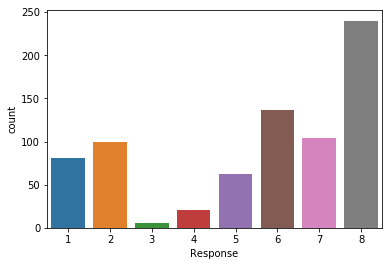

In [22]:
sns.countplot(Y_train)
print(Y_train.value_counts())
print(len(Y_train))
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
print("Baseline accuracy so to say:")
accuracy_score(np.ones(len(Y_test)) * 8, Y_test)

Baseline accuracy so to say:


0.3

After tuning our hyperparameter we observe that K = 15 gives us a better accuracy which is an improvement over our baseline. We can however this seems to be the maximum accuracy which KNN can offer. In an attempt to improve on this score we try other algorithms.

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 53)
#lr.fit(X_train, Y_train)
from sklearn.grid_search import GridSearchCV
parameters = {"C": [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}
fitmodel_lr = GridSearchCV(lr, param_grid = parameters, cv = 5)
fitmodel_lr.fit(X_train, Y_train)
fitmodel_lr.best_estimator_, fitmodel_lr.best_params_, fitmodel_lr.best_score_, fitmodel_lr.grid_scores_

(LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='multinomial',
           n_jobs=1, penalty='l2', random_state=53, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 {'C': 0.01},
 0.4093333333333333,
 [mean: 0.40933, std: 0.03363, params: {'C': 0.01},
  mean: 0.39600, std: 0.02913, params: {'C': 0.05},
  mean: 0.38800, std: 0.03349, params: {'C': 0.1},
  mean: 0.37733, std: 0.02335, params: {'C': 0.3},
  mean: 0.37333, std: 0.02610, params: {'C': 0.5},
  mean: 0.37333, std: 0.03028, params: {'C': 0.7},
  mean: 0.36800, std: 0.02891, params: {'C': 0.9},
  mean: 0.36800, std: 0.03028, params: {'C': 1}])

In [25]:
lr_2 = LogisticRegression(C = 0.01, random_state = 53)
lr_2.fit(X_train, Y_train)
predict_lr = lr_2.predict(X_test)
accuracy_score(predict_lr, Y_test)

0.424

Accuracy aspects considered Logistic Regression provides a slightly better result.

Due to a large number of features I tried implementing a greedy feature elimination algorithm, trying to see if lesse number of features provide a better representation by cutting through the unnecessary noise.


In [46]:
array_plot = []
from sklearn.feature_selection import RFE
lr = LogisticRegression(C = 0.01, random_state = 53)

for i in range(2,52):    
    selector = RFE(lr, i, step = 1)
    selector = selector.fit(X_train, Y_train)
    n_pred = selector.predict(X_test)
    pl = accuracy_score(n_pred, Y_test)
    array_plot.append(pl)
#selector.support_

In [49]:
np.argmax(array_plot)

6

In [51]:
array_plot[6]

0.464